Никита № 210134120970:k

In [98]:
import matplotlib.pyplot as plt
import numpy as np

In [99]:
base_h = 5.795 # см
_maybe_correct_base_h = 5.755 # см

delta_h = 7.53 - base_h # разность высот в u-образной штуке
T = 22.64 + 273.15      # К
sigma_T = .5            # K
sigma_h = .005 * 0.01   # m

RHO_HG = 13600
g      = 9.81
CVT_K  = 273.15

In [100]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

In [101]:
class Experiment:
    def __init__(self, Ts, hs, bases_h) -> None:
        self.Ts             = [CVT_K + T for T in Ts]
        self.dh             = [(h - base_h) * 0.01 for h, base_h in zip(hs, bases_h)]
        self.deltas_p       = [RHO_HG * g * dh for dh in self.dh]
        self.sigmas_delta_p = [RHO_HG * g * sigma_h] * len (Ts)
        self.sigmas_T       = [sigma_T] * len (Ts)
        self.dT_dP, self.b_TP, self.kerr, self.berr = LeastSquares (self.deltas_p, self.Ts)

        print ("data received")

    def DrawTP (self, title):
        plt.figure()
        plt.title(title)
        plt.xlabel("$P, Па$")
        plt.ylabel("$T, К$")

        plt.grid(True, linestyle = '--')

        plt.errorbar(self.deltas_p, self.Ts, xerr=self.sigmas_delta_p, yerr=self.sigmas_T, ls = "None", fmt=".k")

        k = self.dT_dP
        b = self.b_TP
        x = np.array ([self.deltas_p[0], self.deltas_p[-1]])
        plt.plot (x, k * x + b, "-", linewidth = 1)

        plt.show()

    def DrawLogTP (self):


In [102]:
T       = [22.64, 23.36, 24.33, 25.29, 26.17, 27.12, 28.07, 29.10, 30.05, 31.15, 33.03, 34.08, 35.15, 36.13, 37.05, 38.10, 39.10, 40]
h       = [7.53,  7.515, 7.575, 7.67,  7.71,  7.805, 7.865, 7.970, 8.07,  8.145, 8.320, 8.445, 8.570, 8.710, 8.770, 8.965, 9.040, 9.24]
bases_h = [6.02,  5.795, 5.795, 5.755, 5.705, 5.61,  5.555, 5.455, 5.395, 5.300, 5.175, 4.995, 4.905, 4.865, 4.700, 4.600, 4.465, 4.35]
dh_up   = [h - base_h for h, base_h in zip(h, bases_h)]

In [103]:
T       = [40,   39,    38.02, 37.15, 35.15, 34.15, 33.06, 32.05, 31.06, 30.20, 29.05, 28.07, 27.07, 26.12, 25.18, 24.27, 23.32]
h       = [9.24, 9.195, 9.095, 8.93,  8.772, 8.595, 8.445, 8.345, 8.27,  8.17,  8.090, 7.97,  7.91,  7.835, 7.735, 7.64,  7.560]
bases_h = [4.35, 4.360, 4.430, 4.59,  4.775, 4.88,  4.995, 5.05,  5.175, 5.27,  5.355, 5.45,  5.495, 5.565, 5.67,  5.73,  5.845]
dh_down = [h - base_h for h, base_h in zip(h, bases_h)]

In [104]:
ExpTempGrow = Experiment ([22.64, 23.36, 24.33, 25.29, 26.17, 27.12, 28.07, 29.10, 30.05, 31.15, 33.03, 34.08, 35.15, 36.13, 37.05, 38.10, 39.10, 40  ],
                          [7.53,  7.515, 7.575, 7.67,  7.71,  7.805, 7.865, 7.970, 8.07,  8.145, 8.320, 8.445, 8.570, 8.710, 8.770, 8.965, 9.040, 9.24],
                          [6.02,  5.795, 5.795, 5.755, 5.705, 5.61,  5.555, 5.455, 5.395, 5.300, 5.175, 4.995, 4.905, 4.865, 4.700, 4.600, 4.465, 4.35])

data received


In [105]:
ExpTempDrop = Experiment ([40,   39,    38.02, 37.15, 35.15, 34.15, 33.06, 32.05, 31.06, 30.20, 29.05, 28.07, 27.07, 26.12, 25.18, 24.27, 23.32],
                          [9.24, 9.195, 9.095, 8.93,  8.772, 8.595, 8.445, 8.345, 8.27,  8.17,  8.090, 7.97,  7.91,  7.835, 7.735, 7.64,  7.560],
                          [4.35, 4.360, 4.430, 4.59,  4.775, 4.88,  4.995, 5.05,  5.175, 5.27,  5.355, 5.45,  5.495, 5.565, 5.67,  5.73,  5.845])

data received


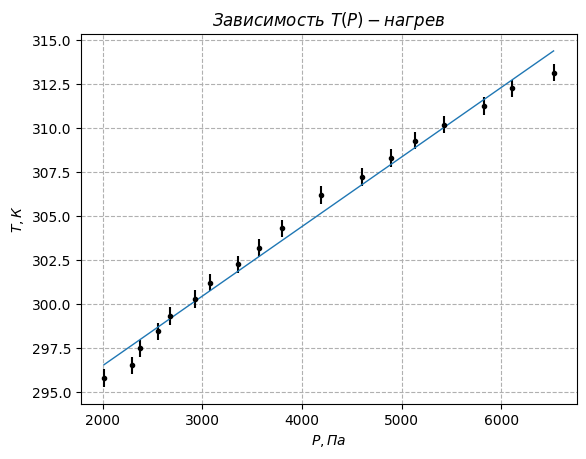

In [106]:
ExpTempGrow.DrawTP('$Зависимость ~T(P) - нагрев$')

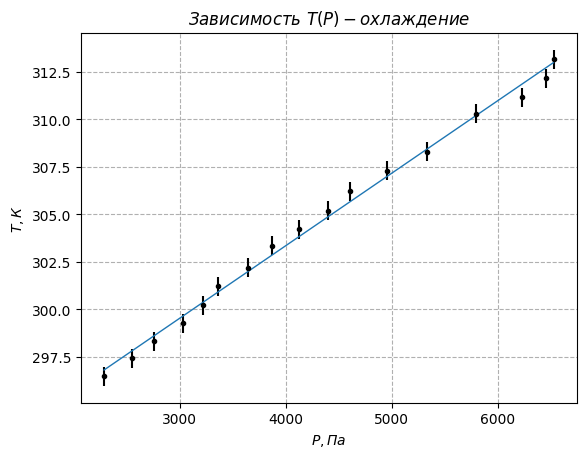

In [107]:
ExpTempDrop.DrawTP('$Зависимость ~T(P) - охлаждение$')